## Weather Prediction using LSTM(LONG SHORT TERM MEMORY) AND SIMPLE RNN(RECURRENT NEURAL NETWORK)

### 1.Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set_style("whitegrid")

### 2.Loading the Dataset

In [ ]:
# Load dataset
df = pd.read_csv("Delhi Temperature.csv")

# Check the shape and data types
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Preview the data
df.head()

Shape of dataset: (100990, 20)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


### 3.Descriptive Statistics

In [7]:
# Summary statistics of numeric columns
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


### 4.Temperature Variance - (histogram view)

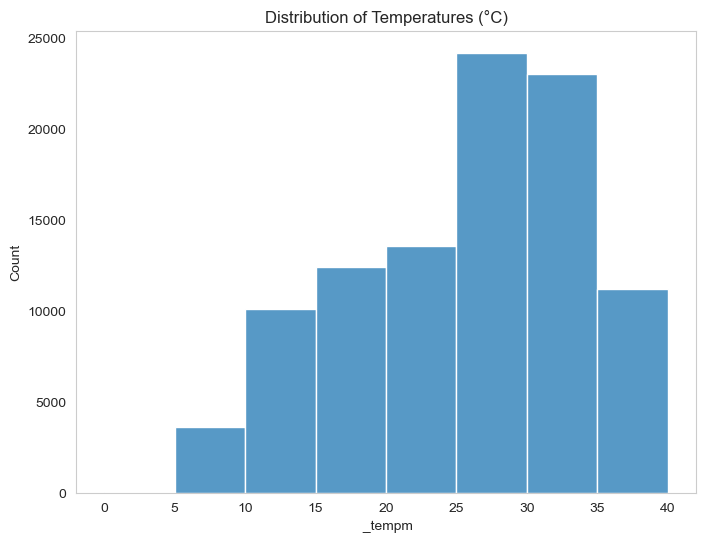

In [9]:
# plot to see the temperature varience
plt.figure(figsize=(8, 6))
sns.histplot(df[' _tempm'], bins=[i for i in range(0, 45, 5)], kde=False)
plt.title("Distribution of Temperatures (°C)")
plt.grid()
plt.show()

### 5.Data Cleaning

#### 5.1 Drop Unnecessary Columns

In [12]:
# Drop unwanted columns
df_clean = df.drop(columns=[' _precipm', ' _heatindexm', ' _wgustm', ' _windchillm',' _conds',' _wdire',' _fog',' _hail',' _rain',' _snow',' _thunder',' _tornado'])

#### 5.2 Parse and Extract Datetime Features

In [14]:
# Convert to datetime
df_clean['datetime_utc'] = pd.to_datetime(df_clean['datetime_utc'],utc="True")

# Extract features
df_clean['year'] = df_clean['datetime_utc'].dt.year
df_clean['month'] = df_clean['datetime_utc'].dt.month
df_clean['day'] = df_clean['datetime_utc'].dt.day
df_clean['hour'] = df_clean['datetime_utc'].dt.hour

# Drop original datetime column
df_clean = df_clean.drop(columns=['datetime_utc'])

# Display cleaned dataset
df_clean.head()

,_dewptm,_hum,_pressurem,_tempm,_vism,_wdird,_wspdm,year,month,day,hour
0,9.0,27.0,1010.0,30.0,5.0,280.0,7.4,1996,11,1,11
1,10.0,32.0,-9999.0,28.0,NaN,0.0,NaN,1996,11,1,12
2,11.0,44.0,-9999.0,24.0,NaN,0.0,NaN,1996,11,1,13
3,10.0,41.0,1010.0,24.0,2.0,0.0,NaN,1996,11,1,14
4,11.0,47.0,1011.0,23.0,1.2,0.0,0.0,1996,11,1,16


#### 5.4 Compute mean of any remaining missing Values

In [16]:
# mean of missing rows (if any remain)
df_clean = df_clean.fillna(df_clean.mean())

# Double-check
df_clean.isnull().sum()

# Display cleaned dataset
df_clean.head()

,_dewptm,_hum,_pressurem,_tempm,_vism,_wdird,_wspdm,year,month,day,hour
0,9.0,27.0,1010.0,30.0,5.000000,280.0,7.400000,1996,11,1,11
1,10.0,32.0,-9999.0,28.0,2.402774,0.0,7.678463,1996,11,1,12
2,11.0,44.0,-9999.0,24.0,2.402774,0.0,7.678463,1996,11,1,13
3,10.0,41.0,1010.0,24.0,2.000000,0.0,7.678463,1996,11,1,14
4,11.0,47.0,1011.0,23.0,1.200000,0.0,0.000000,1996,11,1,16


### 6.Normalize the data

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
target_column = ' _tempm'
features = df_clean.drop(columns=[target_column])
target = df_clean[[target_column]]

# Initialize scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform the data
scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

print("Features shape:", scaled_features.shape)
print("Target shape:", scaled_target.shape)

Features shape: (100990, 10)
Target shape: (100990, 1)


### 7.Create Time Series Sequences

In [20]:
sequence_length = 24  # using past 24 hours

X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i - sequence_length:i])  # 24 past time steps
    y.append(scaled_target[i])  # target is temperature at next hour

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Input shape (X):", X.shape)  # (samples, 24, num_features)
print("Output shape (y):", y.shape)  # (samples, 1)


Input shape (X): (100966, 24, 10)
Output shape (y): (100966, 1)


### 8.Train-Test Split

In [22]:
# Determine sizes
total_samples = X.shape[0]
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

# Split the data
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (70676, 24, 10) (70676, 1)
Validation shape: (15144, 24, 10) (15144, 1)
Testing shape: (15146, 24, 10) (15146, 1)


#### 9.Build & Train the LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_lstm = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Use Input layer here
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))  # Output layer

# Compile model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping,reduce_lr_lstm],
    shuffle=False,
    verbose=1
)

Epoch 1/50
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 141s 107ms/step - loss: 0.0047 - val_loss: 0.0102 - learning_rate: 0.0010
Epoch 2/50
 154/1105 ━━━━━━━━━━━━━━━━━━━━ 1:30 95ms/step - loss: 0.0054

### 10.Plot Training vs. Validation Loss

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 11.LSTM Accuracy Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse scale
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_inv = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)

# Metrics
mse_lstm = mean_squared_error(y_test_inv, y_pred_lstm_inv)
mae_lstm = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
r2_lstm = r2_score(y_test_inv, y_pred_lstm_inv)

print("Accuracy Metrics for LSTM:")
print(f"MSE: {mse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")
print(f"R²:  {r2_lstm:.4f}")

### 12.Build & Train the RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Callbacks
early_stopping_rnn = EarlyStopping(
    monitor='val_loss',
    patience=5,                   # Early stop quicker
    restore_best_weights=True,
    verbose=1
)

reduce_lr_rnn = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Build RNN Model
rnn_model = Sequential()
rnn_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(32, return_sequences=False))
rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(1))  # Output

# Compile
rnn_model.compile(optimizer='adam', loss='mse')

# Train
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_rnn, reduce_lr_rnn],
    shuffle=False,
    verbose=1
)

### 13.Plot Training v/s validation loss

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 14.RNN Accuracy Metrics

In [ ]:
# Predict and inverse scale
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_inv = target_scaler.inverse_transform(y_pred_rnn)

# Metrics
mse_rnn = mean_squared_error(y_test_inv, y_pred_rnn_inv)
mae_rnn = mean_absolute_error(y_test_inv, y_pred_rnn_inv)
r2_rnn = r2_score(y_test_inv, y_pred_rnn_inv)

print("Accuracy Metrics for RNN:")
print(f"MSE: {mse_rnn:.4f}")
print(f"MAE: {mae_rnn:.4f}")
print(f"R²:  {r2_rnn:.4f}")

### 15.Compare Loss Curves of LSTM V/S RNN

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', color='green')
plt.title('Validation Loss: LSTM vs RNN')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 16.Ensemble (Average) Accuracy Metrics

In [ ]:
# Average predictions and inverse scale
y_pred_ensemble = (y_pred_lstm + y_pred_rnn) / 2
y_pred_ensemble_inv = target_scaler.inverse_transform(y_pred_ensemble)

# Metrics
mse_ensemble = mean_squared_error(y_test_inv, y_pred_ensemble_inv)
mae_ensemble = mean_absolute_error(y_test_inv, y_pred_ensemble_inv)
r2_ensemble = r2_score(y_test_inv, y_pred_ensemble_inv)

print("Accuracy Metrics for Ensemble (Average):")
print(f"MSE: {mse_ensemble:.4f}")
print(f"MAE: {mae_ensemble:.4f}")
print(f"R²:  {r2_ensemble:.4f}")

### 17.Predict + Average Model Outputs

In [ ]:
# Predict with both models
y_pred_lstm = lstm_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)

# Average predictions
y_pred_avg = (y_pred_lstm + y_pred_rnn) / 2

# Inverse transform predictions and true values
y_pred_lstm_inv = target_scaler.inverse_transform(y_pred_lstm)
y_pred_rnn_inv = target_scaler.inverse_transform(y_pred_rnn)
y_pred_avg_inv = target_scaler.inverse_transform(y_pred_avg)
y_test_inv = target_scaler.inverse_transform(y_test)

# Compare actual vs. predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:100], label='Actual', color='black')
plt.plot(y_pred_lstm_inv[:100], label='LSTM Prediction', alpha=0.6)
plt.plot(y_pred_rnn_inv[:100], label='RNN Prediction', alpha=0.6)
plt.plot(y_pred_avg_inv[:100], label='Averaged Prediction', linestyle='--', color='red')
plt.title("Temperature Prediction Comparison (First 100 Test Samples)")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

### 18.Predict from User Input (with Past Data)

In [ ]:
# Set datetime index if not already done
df_clean.index = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

In [ ]:
from datetime import datetime, timedelta
import numpy as np

def predict_temperature_user_input():
    try:
        # Get user input
        year = int(input("Enter year (e.g., 1996): "))
        month = int(input("Enter month (1-12): "))
        day = int(input("Enter day (1-31): "))
        hour = int(input("Enter hour (0-23): "))

        # Create datetime object
        input_time = datetime(year, month, day, hour)
        start_time = input_time - timedelta(hours=24)

        # Filter 24 previous hours
        mask = (df_clean.index >= start_time) & (df_clean.index < input_time)
        input_data = df_clean.loc[mask].drop(columns=[' _tempm'])

        if input_data.shape[0] < 24:
            print("Not enough historical data to make a prediction.")
            return None

        # Scale and predict
        scaled_input = feature_scaler.transform(input_data)
        X_input = np.expand_dims(scaled_input, axis=0)

        pred_lstm = lstm_model.predict(X_input)
        pred_rnn = rnn_model.predict(X_input)
        pred_avg = (pred_lstm + pred_rnn) / 2

        temperature_pred = target_scaler.inverse_transform(pred_avg)[0][0]

        # Get actual temperature
        if input_time in df_clean.index:
            actual_temp = df_clean.loc[input_time][' _tempm']
            abs_error = abs(actual_temp - temperature_pred)
            accuracy = 100 - (abs_error / abs(actual_temp)) * 100

            print(f"\nPrediction for {input_time.strftime('%Y-%m-%d %H:%M')}")
            print(f"Predicted Temperature: {temperature_pred:.2f}°C")
            print(f"Actual Temperature:    {actual_temp:.2f}°C")
            print(f"Absolute Error:         {abs_error:.2f}°C")
            print(f"Accuracy:               {accuracy:.2f}%")
        else:
            print(f"\nPredicted Temperature for {input_time.strftime('%Y-%m-%d %H:%M')}: {temperature_pred:.2f}°C")
            print("⚠Actual temperature not available in dataset.")

        return temperature_pred

    except Exception as e:
        print("Invalid input or prediction error:", str(e))
predict_temperature_user_input()